In [1]:
# Some standard imports for math and data handling
import sys # to add python directory to the path
import shutil # to delete downloaded fits files once done
import numpy as np # for general math
np.set_printoptions(threshold=sys.maxsize) # NaNs and infs can be a problem, hence this command
import pandas as pd # most data is stored in pandas dataframes
from astroquery.mast import Observations # how to remotely access Kepler data from Mast
import matplotlib.pyplot as plt # for plotting
import pickle # for saving/retreiving data

# Import the custom code developed for this work
sys.path.append('python')
from clusterOutliers import clusterOutliers as coo # the workhorse
import quarterTools as qt # various tools developed specifically for this work
%matplotlib inline

In [2]:
output_path = '/Users/Dan/Documents/KeplerLCs/output/'  # where the calculated features/reductions/outlier scores 
                                                        # are stored as .coo files

In [27]:
Q_dict = dict()
for i in range(1,18): # importing quarters 1 to 17, storing all in a dictionary for easier recall
    with open(output_path+'Q{}.coo'.format(i),'rb') as file:
        Q_dict['Q{}'.format(i)]=pickle.load(file)

In [28]:
top_n=10 # how many of the top outliers to look at

In [17]:
import matplotlib.gridspec as gridspec

In [69]:
def plot_top_n(df,n=10,sortby='sAverage'):
    """
    Args:
        df (dataframe) - The scores dataframe 
        n (int) - number of plots to create of most outlying points
        sortby (optional, str) - how to sort scores, default is the sampled average of k=4 to 13
        top_n_df (optional, boolean) - whether or not to return a dataframe containing the features of the top outliers
    returns:
        top_n_feats (optional, dataframe) - pandas dataframe containing the features of the top n outliers
    """
    tmp = df.sort_values(by=sortby,ascending=False)
    filenames = list(tmp.index[:n])
    obj_ids = [i[:13] for i in tmp.index[:n]]
    keplerObs = Observations.query_criteria(target_name=obj_ids, obs_collection='Kepler')
    keplerProds = Observations.get_product_list(keplerObs)
    yourProd = Observations.filter_products(keplerProds, extension=filenames)
    manifest = Observations.download_products(yourProd)
    
    """
    The process of downloading the files sorts them in numerical order messing up the 
    order of most outlying to leas, so I'm making the manifest a dataframe and sampling it
    one at a time from the filenames, not sure if there's a way to just sort the whole list
    based on the original order.
    """
    manifest = manifest.to_pandas(index='Local Path')
    fig = plt.figure(figsize=(10,1.2*n))
    for i,f in enumerate(filenames): # forcing the order to match most to least outlying
        f_sampler = qt.make_sampler([f]) # to find the right file from manifest
        filename = f_sampler(manifest).index[0] # full local filepath
        t,nf,err = qt.read_kepler_curve(filename)
        ax = fig.add_subplot(n,1,i+1)
        ax.errorbar(t,nf,err)
        ax.set_title('KIC {}'.format(int(obj_ids[i][4:])),fontsize=16)
        ax.axhline(1,c='black',linestyle='--',alpha=.6)
        ax.tick_params(labelsize=14)
        if i!=len(filenames)-1:
            ax.set_xticklabels([])
        ax.set_ylabel(r"$\frac{\Delta~F}{F}$",fontsize=25)
    plt.xlabel("Time (days)",fontsize=20)
    fig.tight_layout()
    shutil.rmtree('./mastDownload') # removing the downloaded data
    return


## Q1

INFO: Found cached file ./mastDownload/Kepler/kplr004902072_lc_Q011110111011101110/kplr004902072-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO: Found cached file ./mastDownload/Kepler/kplr005473556_lc_Q111111111111111111/kplr005473556-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO: Found cached file ./mastDownload/Kepler/kplr005944707_lc_Q011110111011101110/kplr005944707-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO: Found cached file ./mastDownload/Kepler/kplr006200250_lc_Q111111111111111111/kplr006200250-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO: Found cached file ./mastDownload/Kepler/kplr008702065_lc_Q111111111111111111/kplr008702065-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO: Found cached file ./mastDownload/Kepler/kplr008894914_lc_Q011111111111111111/kplr008894914-2009166043257_llc.fits with expected size 192960. [astroquery.query]
INFO

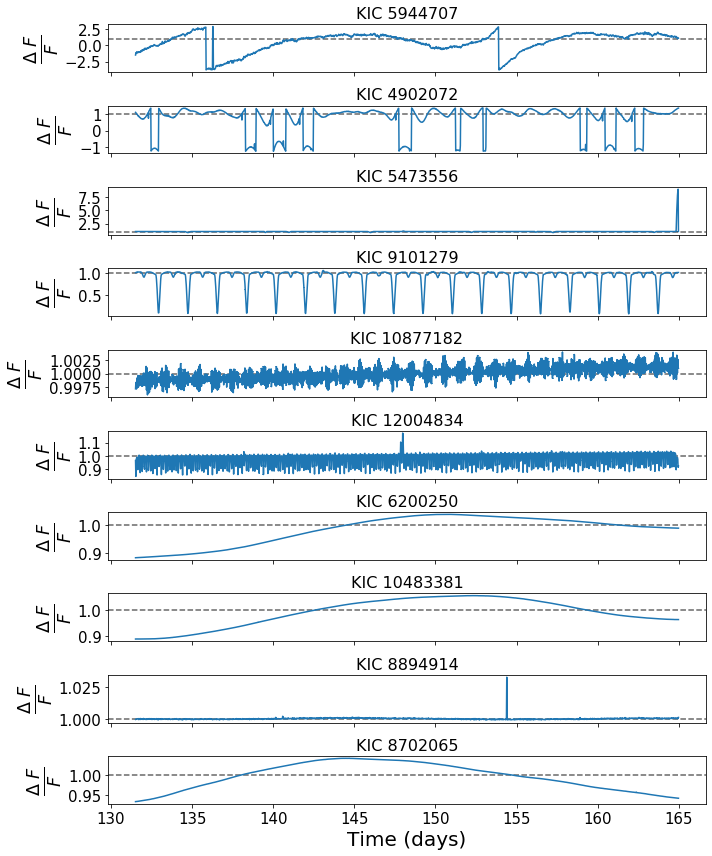

In [70]:
plot_top_n(Q_dict['Q1'].scores,sortby='Average')
plt.savefig('Plots/PlotsForScoringPaper/Q1_top10.pdf')

In [48]:
Q1_outliers

,longtermtrend,meanmedrat,skews,varss,coeffvar,stds,numoutliers,numnegoutliers,numposoutliers,numout1s,...,percentamp,magratio,sautocorrcoef,autocorrcoef,flatmean,tflatmean,roundmean,troundmean,roundrat,flatrat
kplr005252698-2009166043257_llc.fits,0.003178,0.989659,-1.269559,1.253229e-03,0.035771,0.035401,0,0,0,282,...,0.107020,0.186104,-0.089544,0.999989,0.004605,0.000000,0.032993,0.000000,123456.000000,-10.000000
kplr004902072-2009166043257_llc.fits,0.002438,0.676790,-1.618460,6.198323e-01,1.163277,0.787294,0,0,0,263,...,2.238624,0.139270,-0.011384,0.935419,8.050048,5.255544,-24.705111,8.402126,-2.940340,1.531725
kplr005944707-2009166043257_llc.fits,0.047110,0.495930,-1.185268,2.067110e+00,2.899087,1.437745,0,0,0,319,...,4.777905,0.301150,-0.027105,0.972482,6.813911,6.385049,-15.411288,-162.849946,0.094635,1.067167
kplr006200250-2009166043257_llc.fits,0.003922,0.983229,-0.777776,2.509905e-03,0.050953,0.050099,0,0,0,558,...,0.116554,0.248628,0.818823,0.999997,0.000574,0.000000,-0.055478,0.000000,-123456.000000,-10.000000
kplr008894914-2009166043257_llc.fits,0.000006,1.000056,28.363276,8.461544e-07,0.000920,0.000920,1,0,1,28,...,0.033025,18.425488,-0.500997,0.122140,0.008610,-0.000036,-0.004692,0.011232,-0.417758,-239.968319
kplr009540967-2009166043257_llc.fits,0.000003,1.000031,18.530254,3.102292e-07,0.000557,0.000557,2,0,2,172,...,0.017256,11.384305,-0.500218,0.302416,0.005671,-0.000026,-0.022584,-0.052413,0.430885,-214.536957
kplr009101279-2009166043257_llc.fits,-0.000356,0.915934,-2.663651,4.847933e-02,0.240389,0.220180,0,0,0,180,...,0.933228,0.067472,0.921712,0.973358,0.187073,6.999132,-4.801711,90.593031,-0.053003,0.026728
kplr010877182-2009166043257_llc.fits,0.000041,1.000022,0.053981,1.423249e-06,0.001193,0.001193,0,0,0,545,...,0.003537,0.657607,-0.612093,-0.415131,-0.002092,0.000007,-0.323955,1.164526,-0.278186,-313.417580
kplr010483381-2009166043257_llc.fits,0.002851,0.992348,-0.502737,2.730531e-03,0.052657,0.052254,0,0,0,673,...,0.108856,0.339820,0.737127,0.999994,0.001570,0.000000,-0.031594,0.000000,-123456.000000,-10.000000
kplr012072767-2009166043257_llc.fits,0.003963,1.000331,-0.003687,1.921382e-03,0.043819,0.043834,0,0,0,831,...,0.067420,0.488435,0.584956,0.999992,0.003632,0.000000,0.077445,0.000000,123456.000000,-10.000000


## Q2

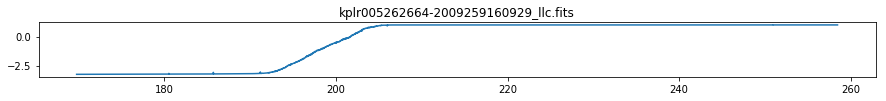

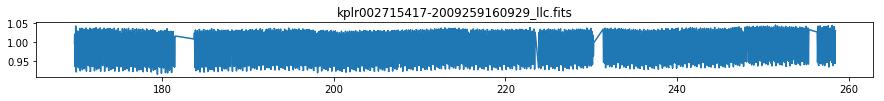

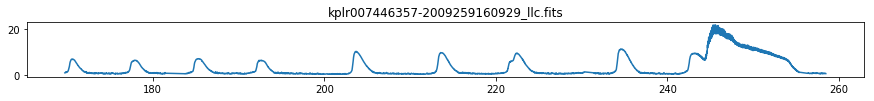

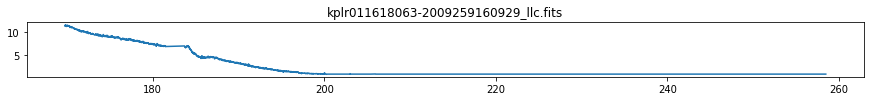

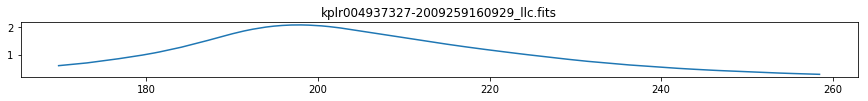

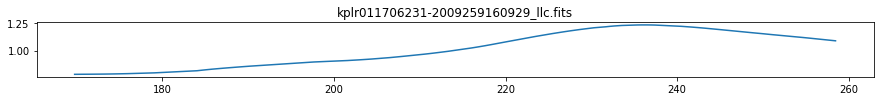

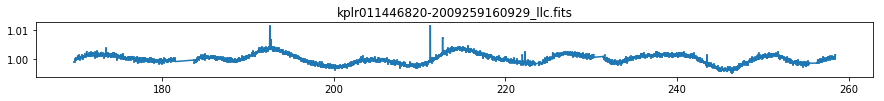

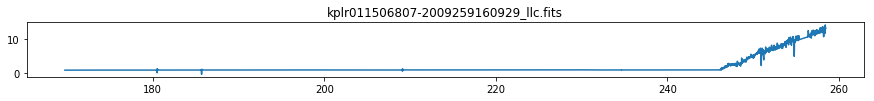

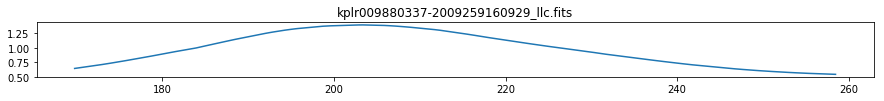

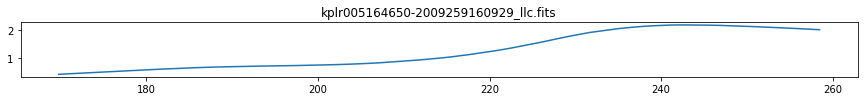

In [5]:
Q='Q2'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+'/'+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])


## Q3

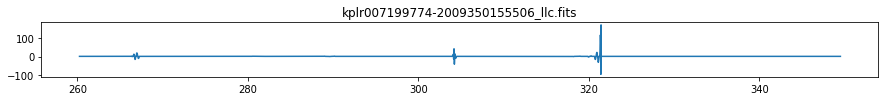

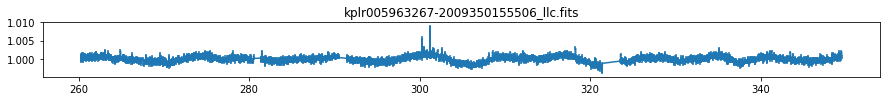

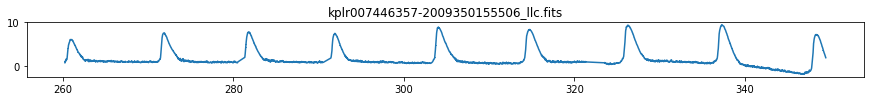

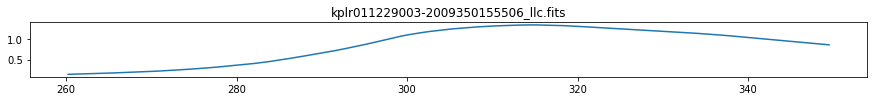

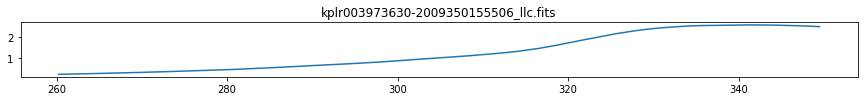

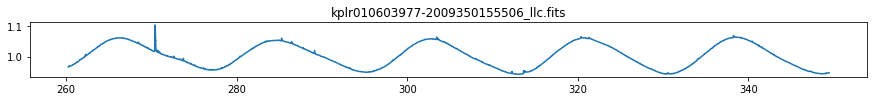

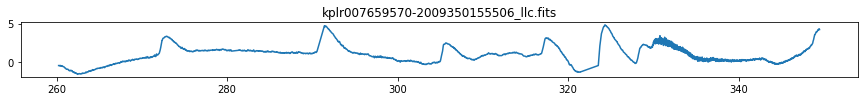

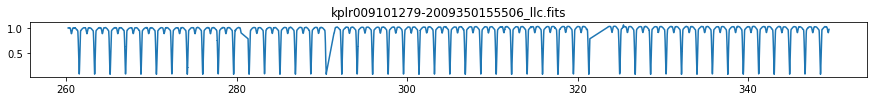

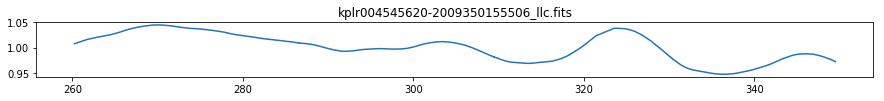

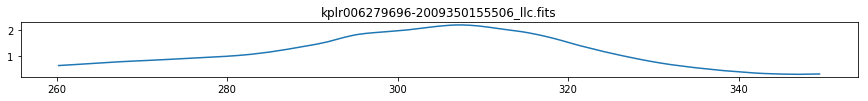

In [7]:
Q='Q3'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+"/"+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])


## Q4

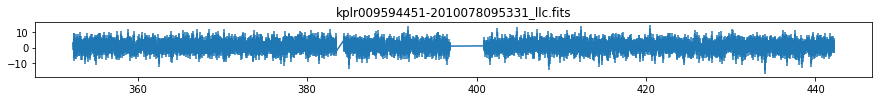

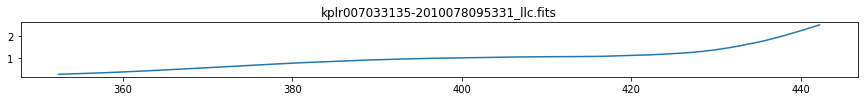

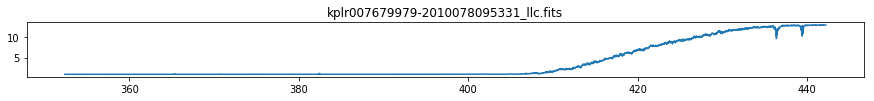

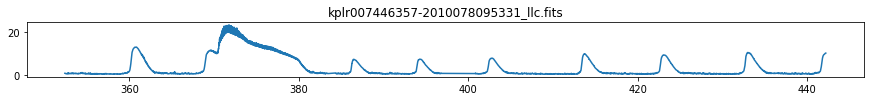

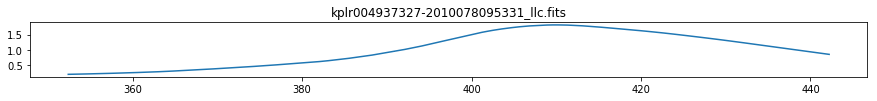

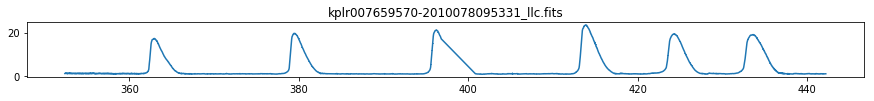

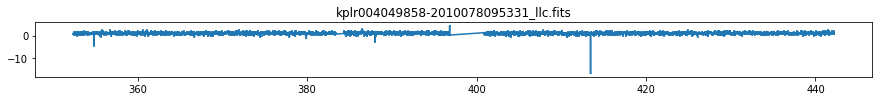

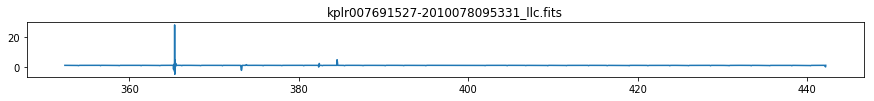

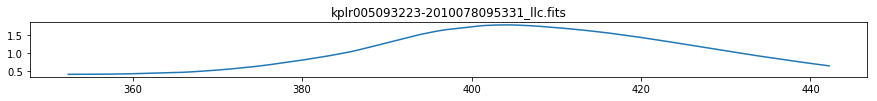

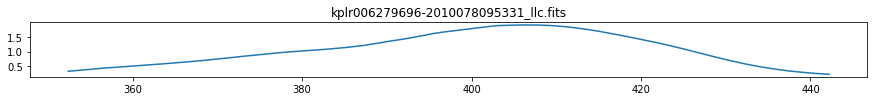

In [8]:
Q='Q4'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])


## Q5

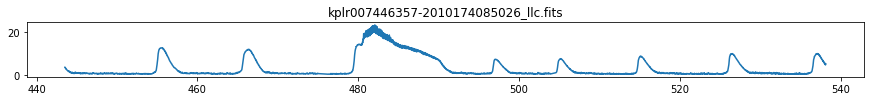

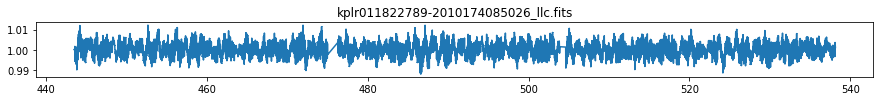

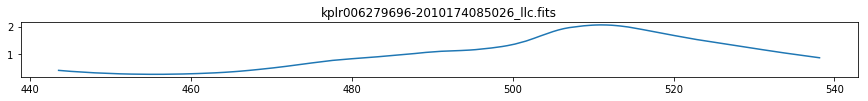

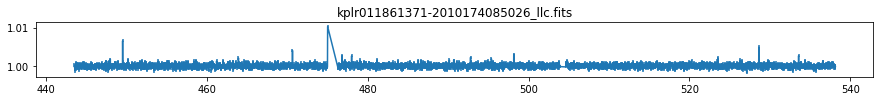

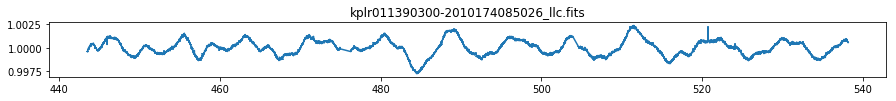

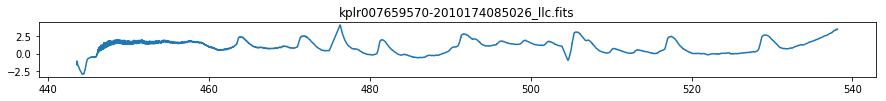

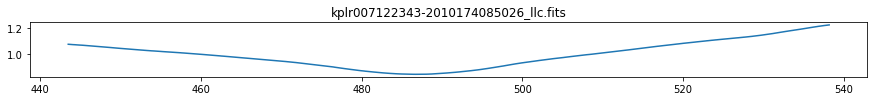

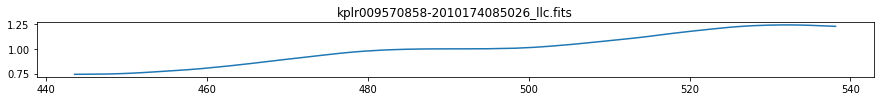

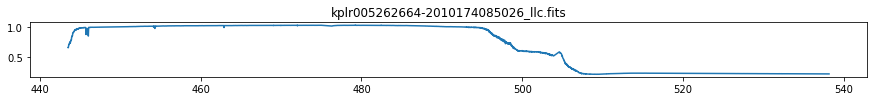

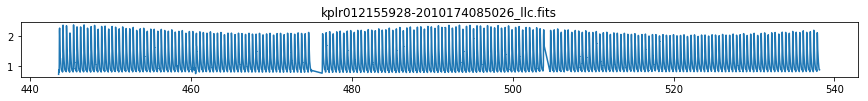

In [10]:
Q='Q5'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

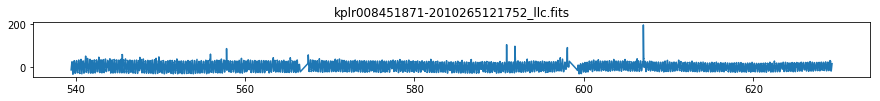

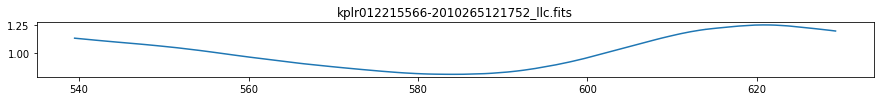

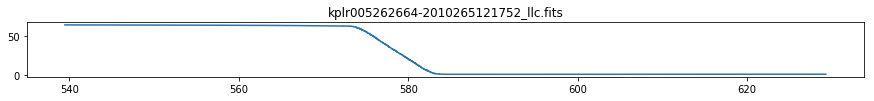

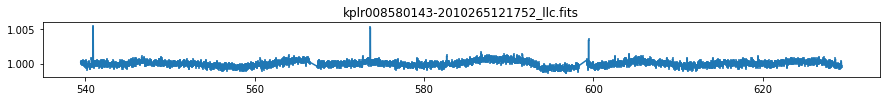

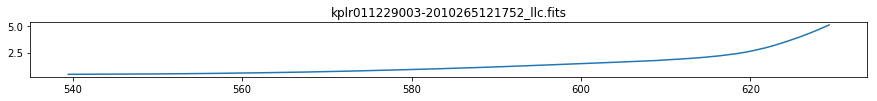

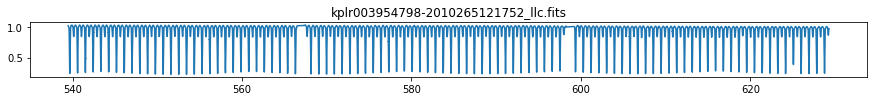

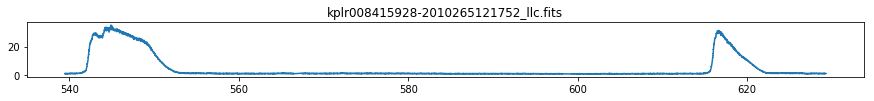

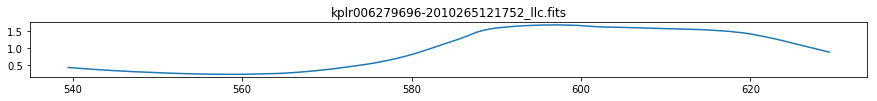

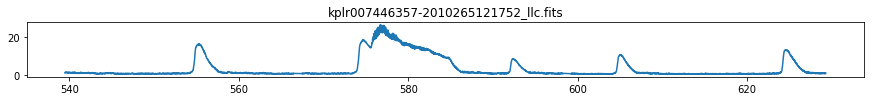

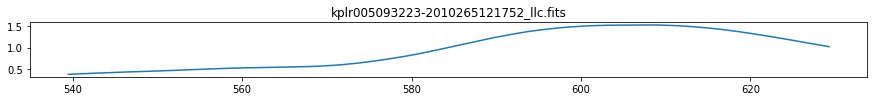

In [11]:
Q='Q6'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

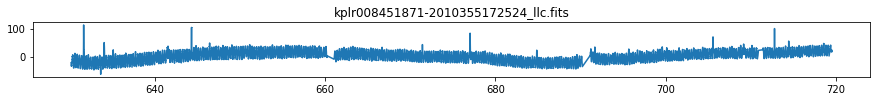

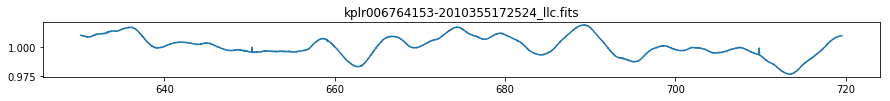

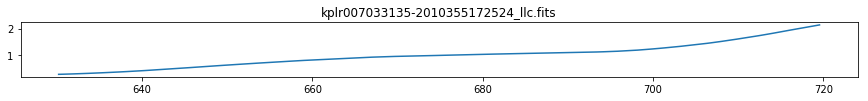

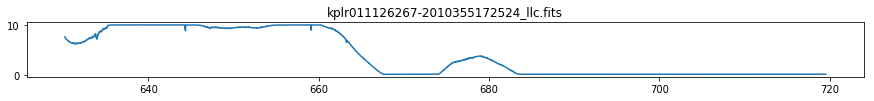

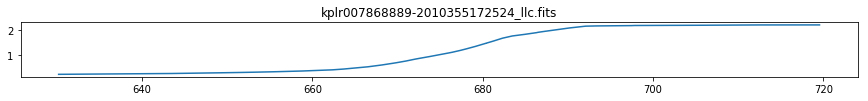

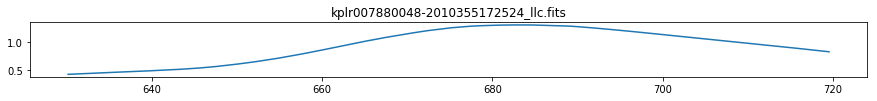

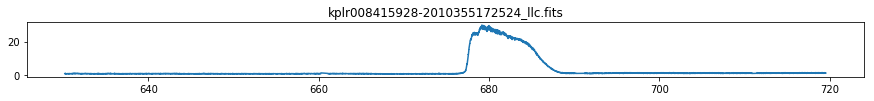

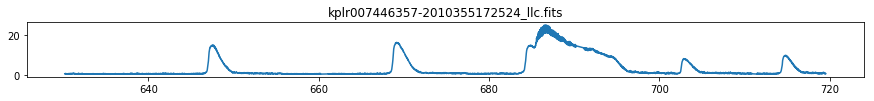

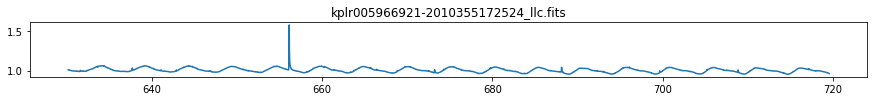

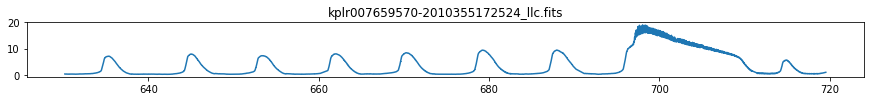

In [12]:
Q='Q7'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

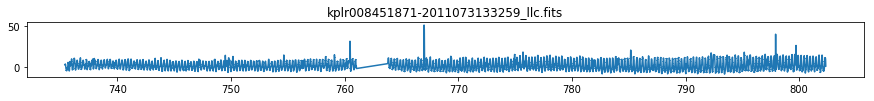

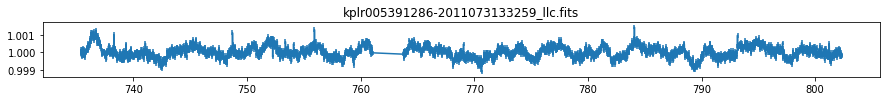

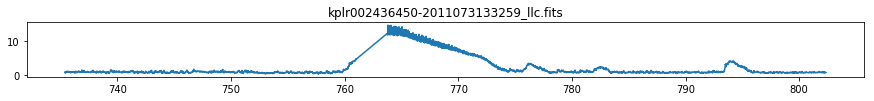

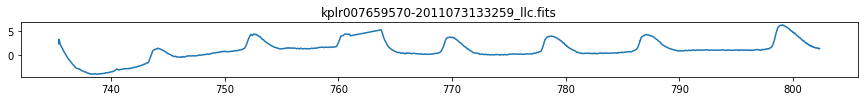

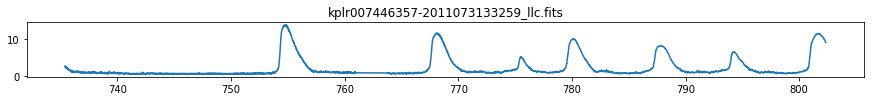

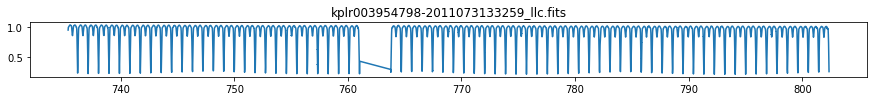

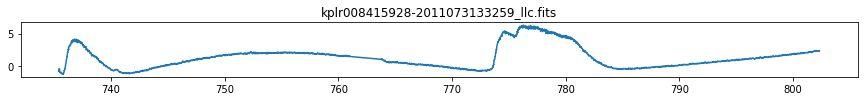

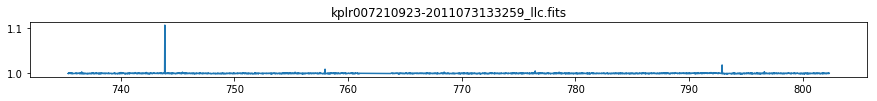

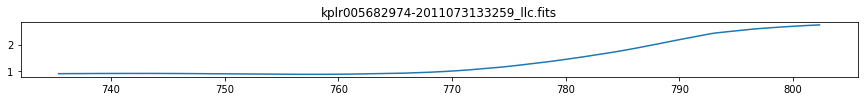

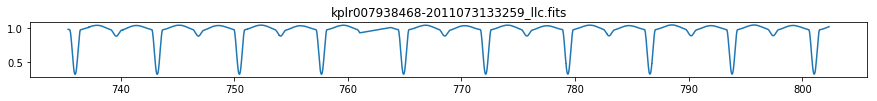

In [13]:
Q='Q8'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

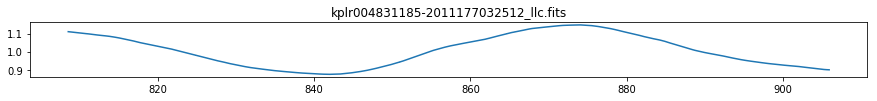

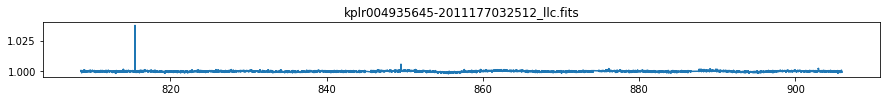

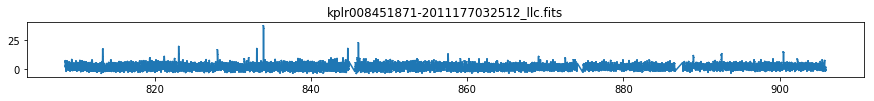

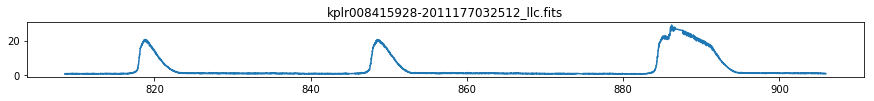

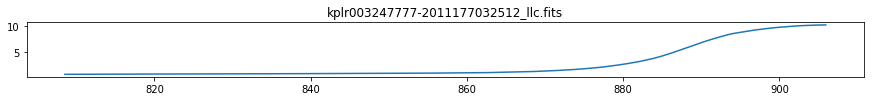

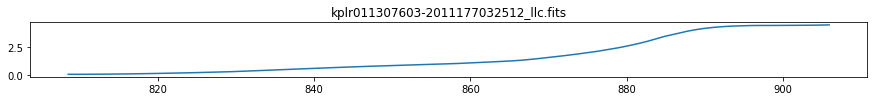

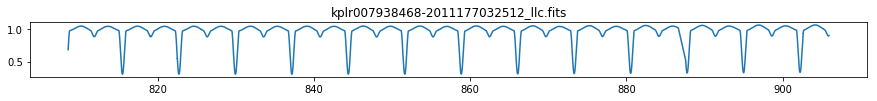

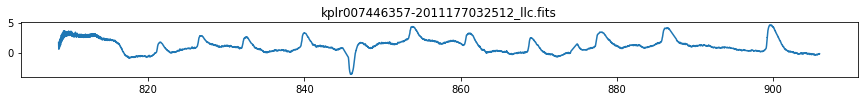

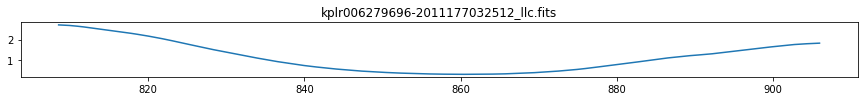

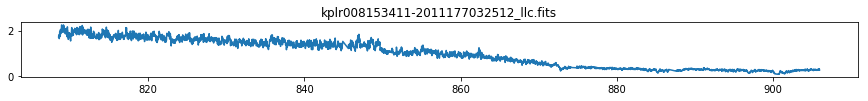

In [14]:
Q='Q9'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

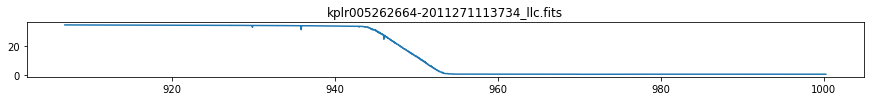

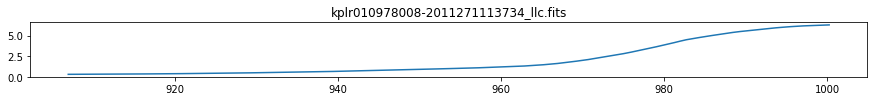

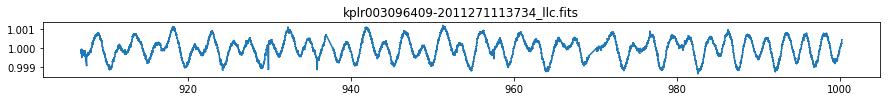

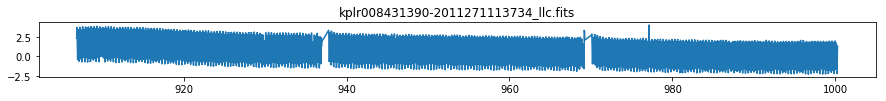

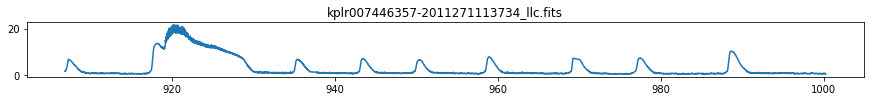

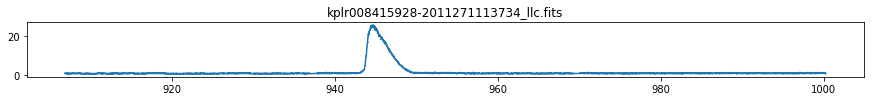

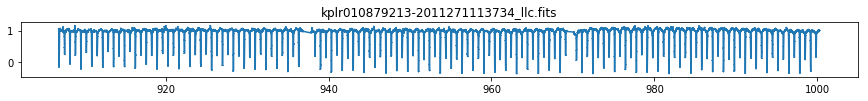

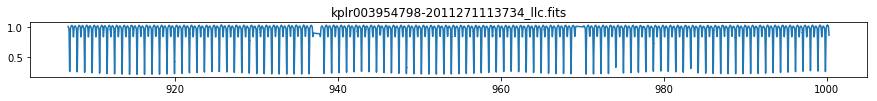

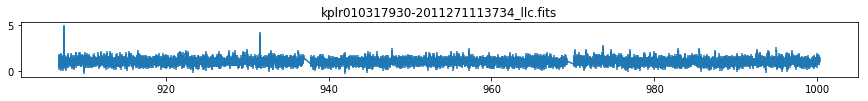

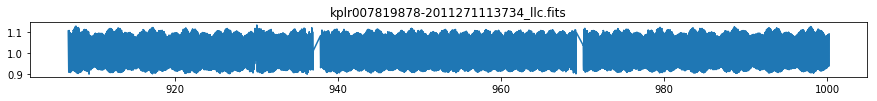

In [15]:
Q='Q10'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

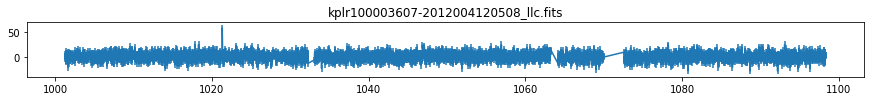

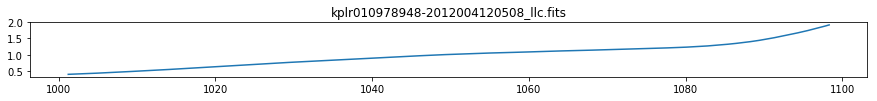

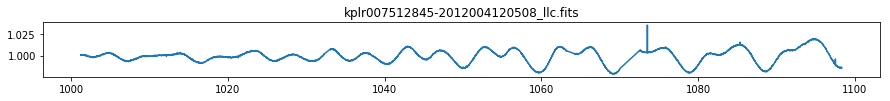

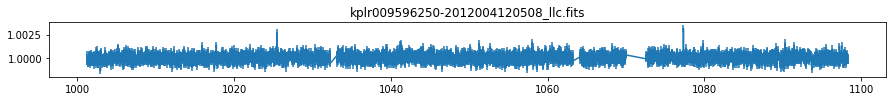

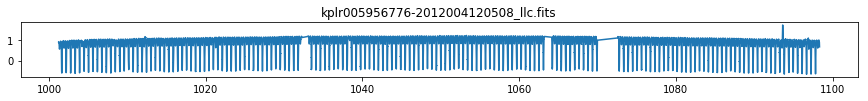

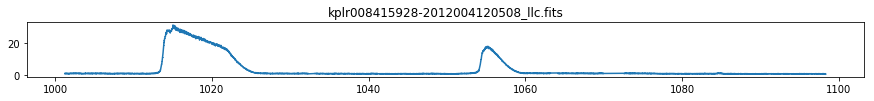

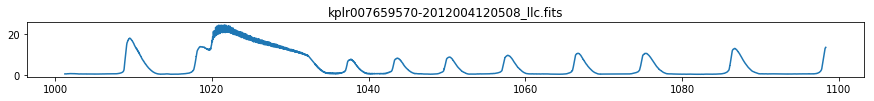

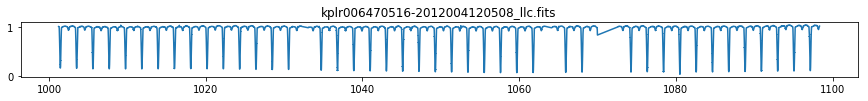

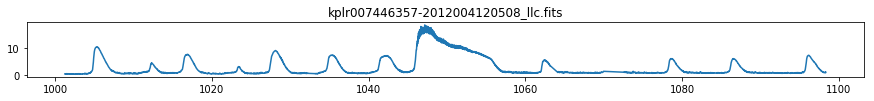

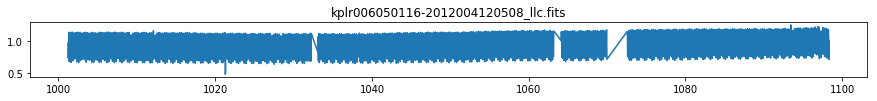

In [16]:
Q='Q11'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

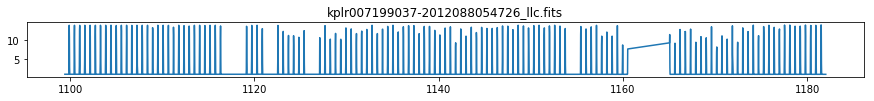

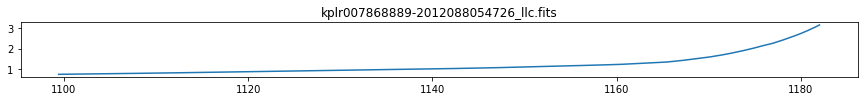

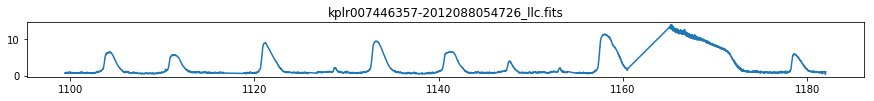

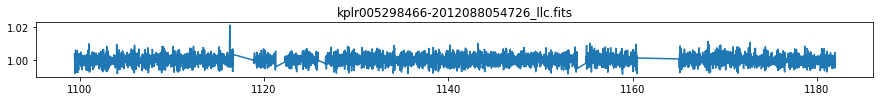

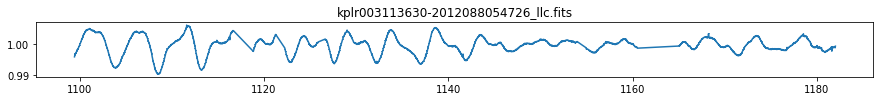

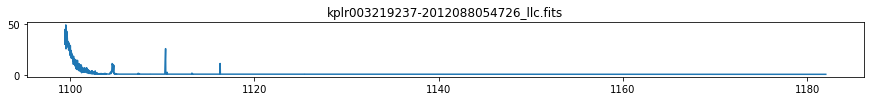

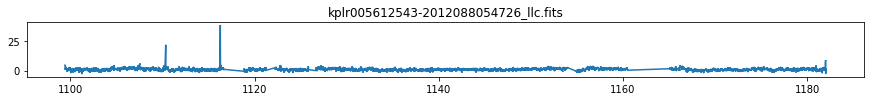

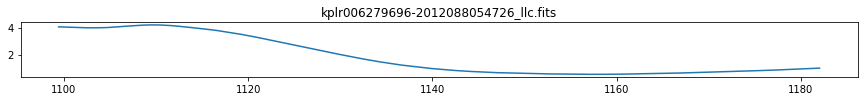

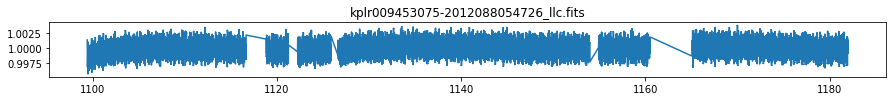

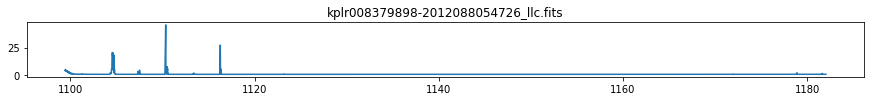

In [17]:
Q='Q12'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

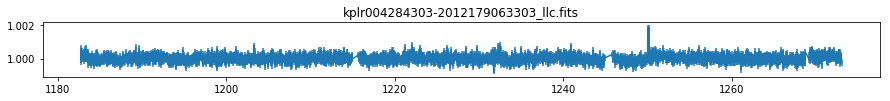

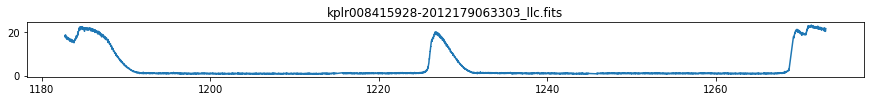

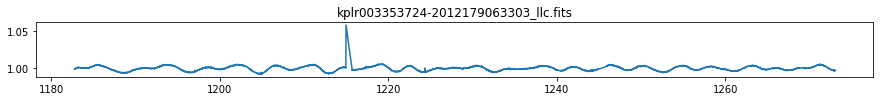

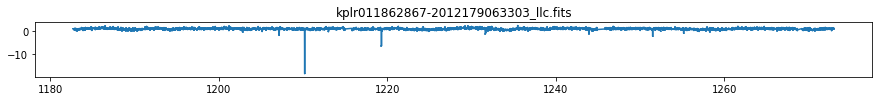

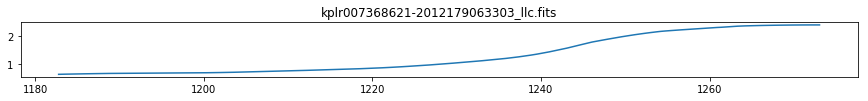

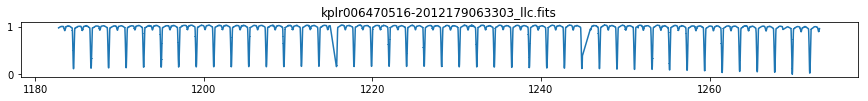

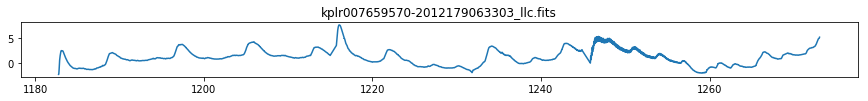

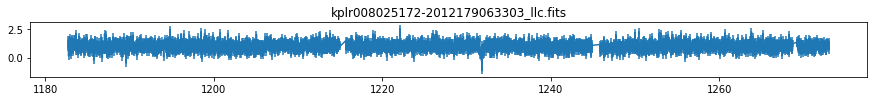

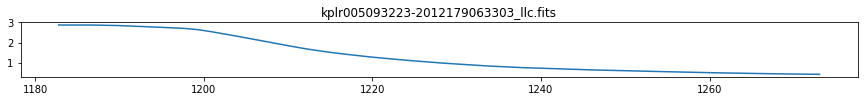

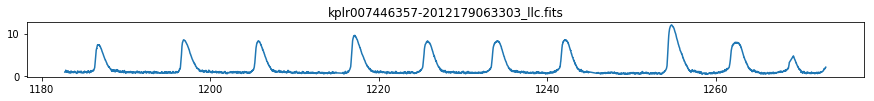

In [18]:
Q='Q13'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

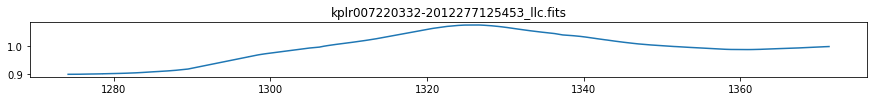

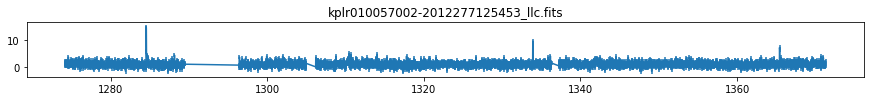

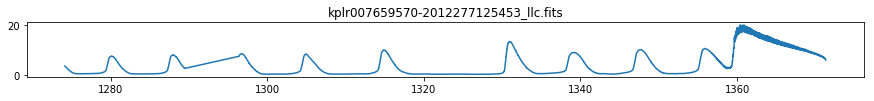

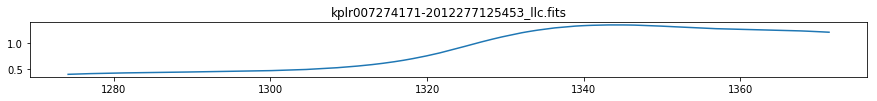

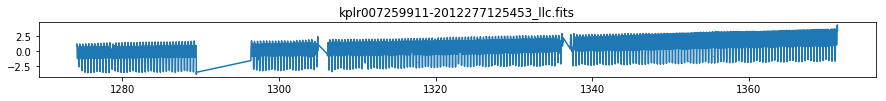

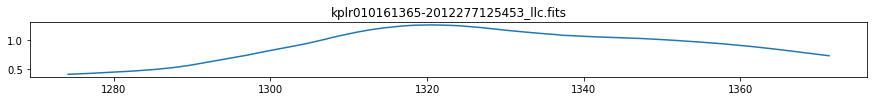

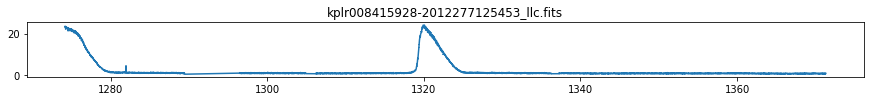

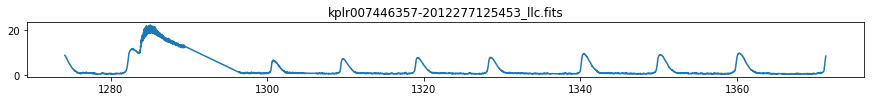

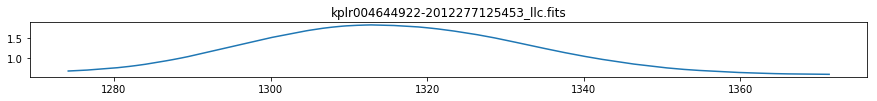

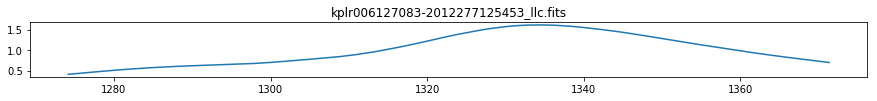

In [19]:
Q='Q14'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

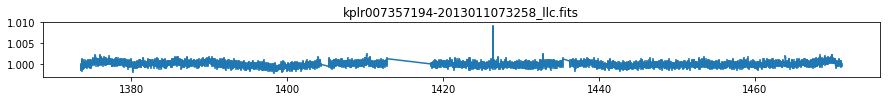

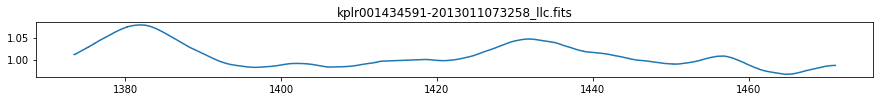

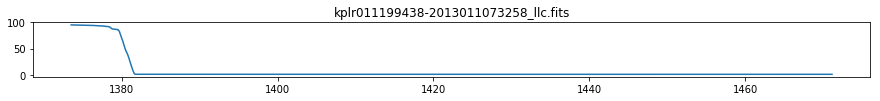

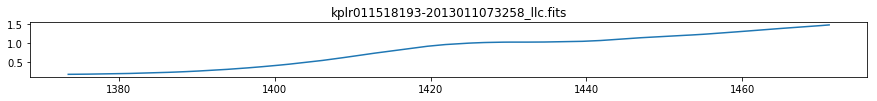

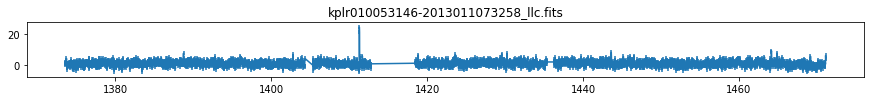

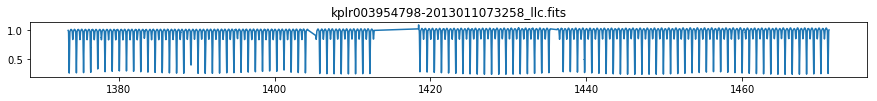

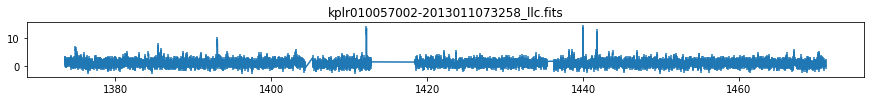

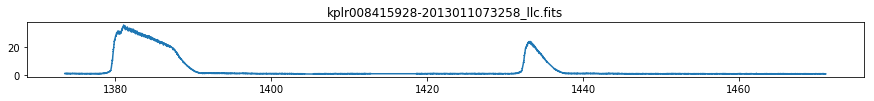

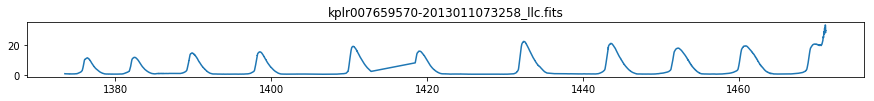

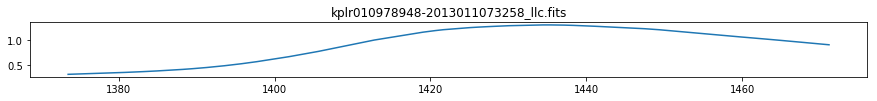

In [20]:
Q='Q15'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

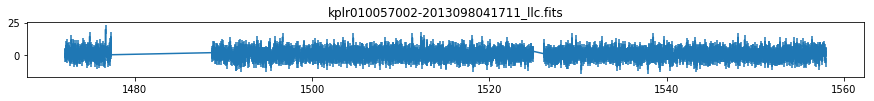

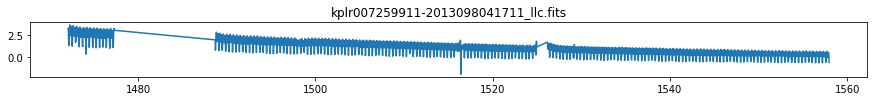

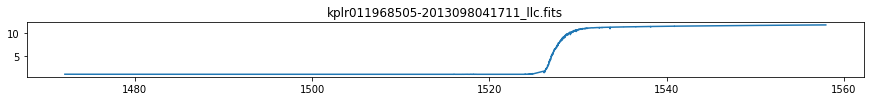

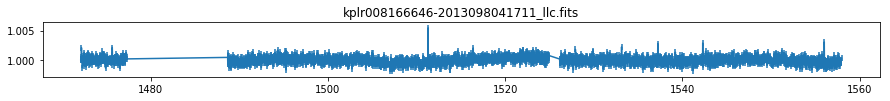

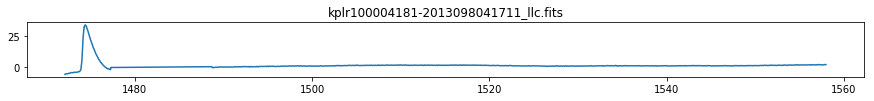

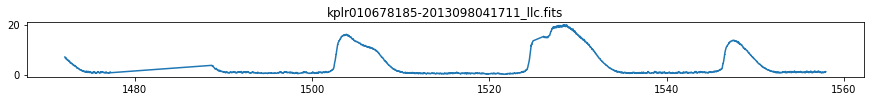

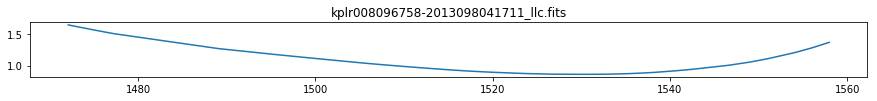

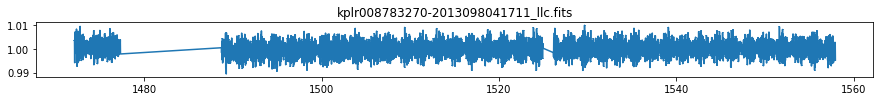

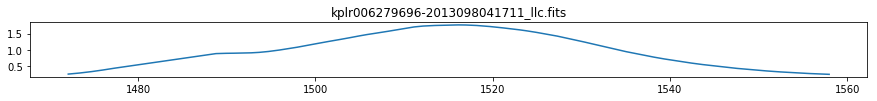

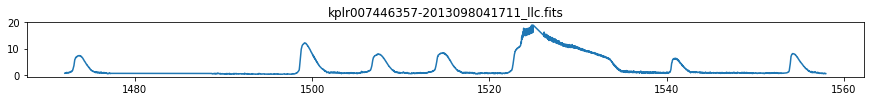

In [21]:
Q='Q16'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])

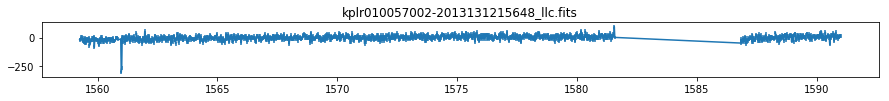

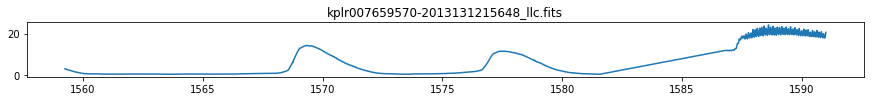

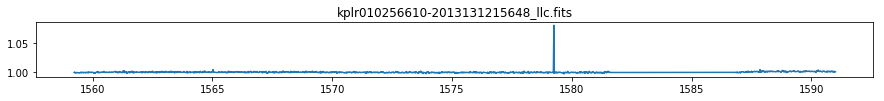

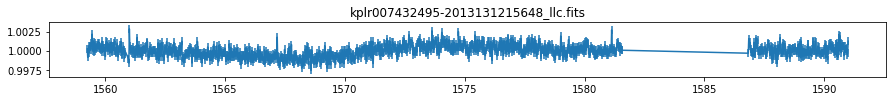

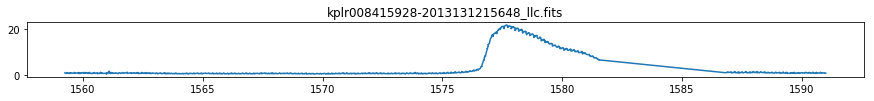

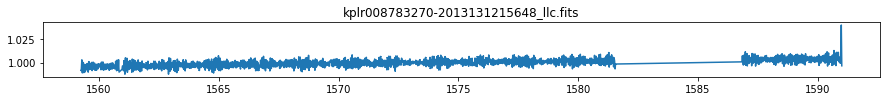

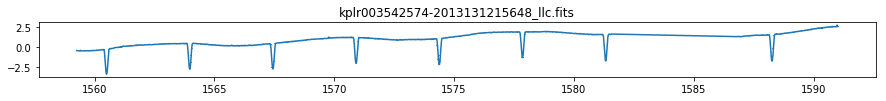

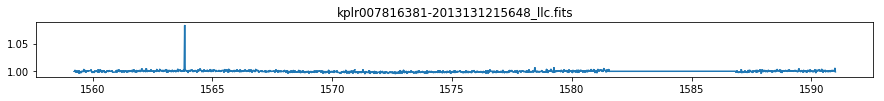

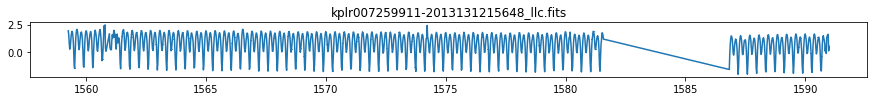

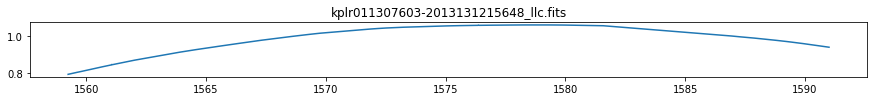

In [22]:
Q='Q17'
tmpcoo = Q_dict[Q]
fitsDir = tmpcoo.fitsDir
tmp =tmpcoo.scores.sort_values(by='PCA90_sAverage',ascending=False).rank(ascending=False)

for i in range(top_n):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    obj = tmp.index[i]
    t, nf, err = qt.read_kepler_curve(fitsDir+tmp.index[i])
    ax.errorbar(t,nf,err)
    plt.title(tmp.index[i])